In [1]:
import os
import sys
import asyncio
import logging

import numpy as np

from lsst.ts import salobj

import matplotlib.pyplot as plt

from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign

In [2]:
os.environ["LSST_DDS_DOMAIN"] = 'lsatmcs'
os.environ["OSPL_URI"] = "file:///home/tribeiro/ospl.xml"

In [3]:
stream_handler = logging.StreamHandler(sys.stdout)

logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [4]:
cwfs = LatissCWFSAlign(index=1, remotes=True)

In [5]:
await cwfs.start_task

Read historical data in 0.01 sec
Read historical data in 0.96 sec
Read historical data in 1.34 sec
Read historical data in 1.64 sec
Read historical data in 2.53 sec
Read historical data in 2.94 sec
Read historical data in 4.15 sec
Read historical data in 5.61 sec
Read historical data in 7.25 sec
Read historical data in 8.00 sec
Read historical data in 11.44 sec
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 13 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 44 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 10 messages
Read historical data in 0.15 sec
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 47 messages
Remo

In [6]:
logger.level = logging.INFO

In [ ]:
# await cwfs.hexapod_offset(+2*cwfs.dz)

In [ ]:
# await cwfs.attcs.ataos.cmd_resetOffset.start()

In [54]:
cwfs.filter = "empty_1"
cwfs.grating = "empty_1"

In [8]:
# cwfs.intra_visit_id = 2020031200280
# cwfs.extra_visit_id = 2020031200281
cwfs.dataPath = "/project/shared/auxTel"
# cwfs.angle = 10.
# print(cwfs.camera_rotation_angle)

RemoteEvent(ATMCS, 0, target) falling behind; read 74 messages


In [ ]:
cwfs.exposure_time

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.5, z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0.5, y=-0.5, z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=-0.5, y=0., z=0.)

In [ ]:
cwfs.intra_visit_id = 2020031200332
cwfs.extra_visit_id = 2020031200333

In [9]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400027
extraImage expId for target: 2020031400028


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
AT_O_20200314_000027: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000028: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 47 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 52 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 57 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 12 messages
RemoteEvent

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224910849792 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224910849792 and this is thread id 140232486672192.
Exception ignore

Running CWFS code.
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 14 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 64 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 13 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 13 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
Measured zernike coeficients: [-3.124557183438768, -13.91162321622301, 323.06831831566126]
De-rotated zernike coeficients: [-14.12465177   1.94687709 323.06831832]
Hexapod offset: [ 0.10782177  0.01486166 -0.07692103]
Telescope offsets: [6.46930616 0.89169943 0.        ]



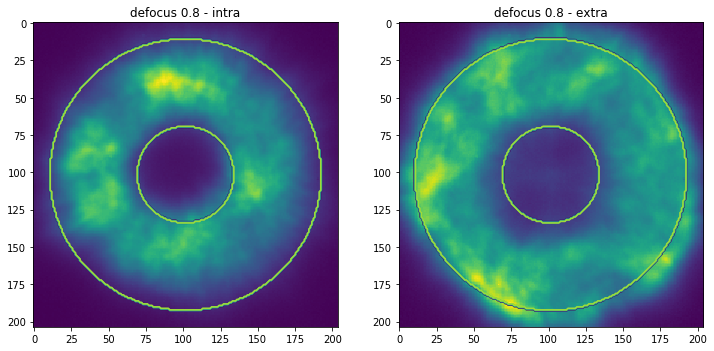

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages


In [10]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [11]:
cwfs.show_results()

Measured zernike coeficients: [-3.124557183438768, -13.91162321622301, 323.06831831566126]
De-rotated zernike coeficients: [-14.12465177   1.94687709 323.06831832]
Hexapod offset: [ 0.10782177  0.01486166 -0.07692103]
Telescope offsets: [6.46930616 0.89169943 0.        ]



In [12]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0., z=-0.07692103)

In [13]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [14]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400029
extraImage expId for target: 2020031400030


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000029: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 32 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000030: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 23 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 46 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 56 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 13 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 13 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling beh

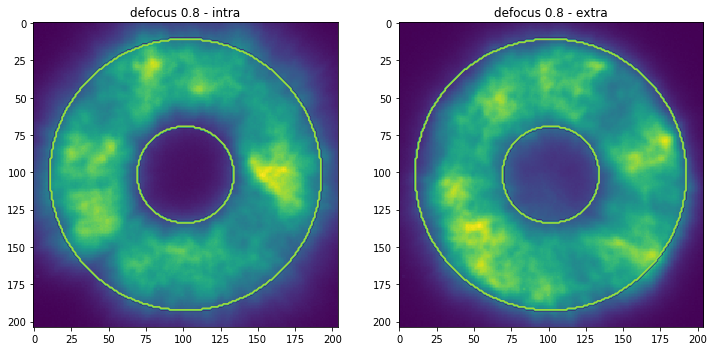

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.


In [15]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [16]:
cwfs.show_results()

Measured zernike coeficients: [9.81682029957002, -25.192343054925665, -61.670768948171755]
De-rotated zernike coeficients: [-23.55975237 -13.26507361 -61.67076895]
Hexapod offset: [ 0.17984544 -0.1012601   0.01468352]
Telescope offsets: [10.79072627 -6.07560623  0.        ]



In [17]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0., z=0.014)

In [18]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [19]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400031
extraImage expId for target: 2020031400032


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000031: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000032: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 32 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
Running source detection algorithm
RemoteTelemetry(ATMCS, 0, mount_AzEl_Encoders) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 46 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 45 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 14 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; re

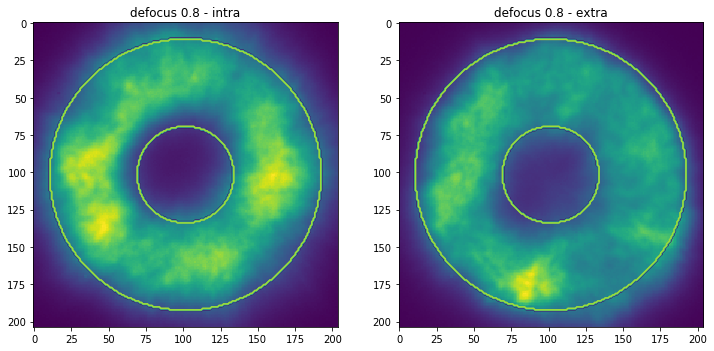

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages


In [20]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [21]:
cwfs.show_results()

Measured zernike coeficients: [25.649457121965614, -20.273305991539882, 11.91244190539591]
De-rotated zernike coeficients: [-14.2791445  -29.41101186  11.91244191]
Hexapod offset: [ 0.1090011  -0.22451154 -0.0028363 ]
Telescope offsets: [  6.54006618 -13.47069246   0.        ]



Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140232486672192.


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [22]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
# cwfs.angle = 140.29

In [23]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400035
extraImage expId for target: 2020031400036


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000035: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000036: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 34 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
Running source detection algorithm
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 13 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 48 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATPneumatics, 0, m1AirPressure) falling behind; read 13 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_mountMotorEncoders) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATDome, 0, position) fal

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224592328448 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224592328448 and this is thread id 140232486672192.
Exception ignore

Measured zernike coeficients: [-7.159561198949705, -31.73009427390703, 72.10016492910736]
De-rotated zernike coeficients: [-31.37798852   8.57204969  72.10016493]
Hexapod offset: [ 0.23952663  0.06543549 -0.01716671]
Telescope offsets: [14.37159779  3.92612963  0.        ]



In [24]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0., z=-0.017)

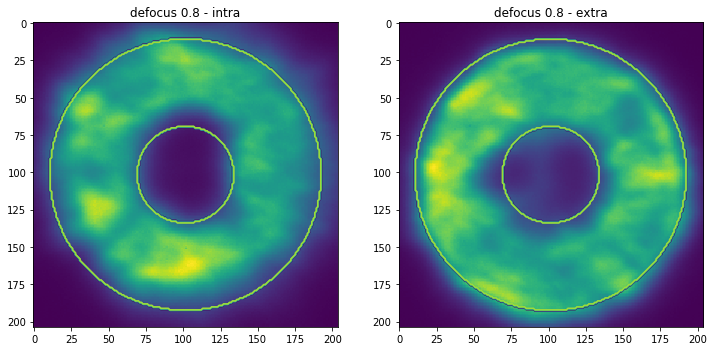

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages


In [25]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [26]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [27]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031400037
extraImage expId for target: 2020031400038


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000037: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 23 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000038: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 19 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 48 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 53 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 16 messages
RemoteE

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224592328448 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224592328448 and this is thread id 140232486672192.
Exception ignore

In [ ]:
Hexapod offset: [ 0.11523418  0.20345898 -0.00034849]
Hexapod offset: [ 0.39853574 -0.22412682 -0.00209254]


In [ ]:
await cwfs.attcs.slew_object("HD 68450", pa_ang=0.)

In [ ]:
cwfs.camera_rotation_angle

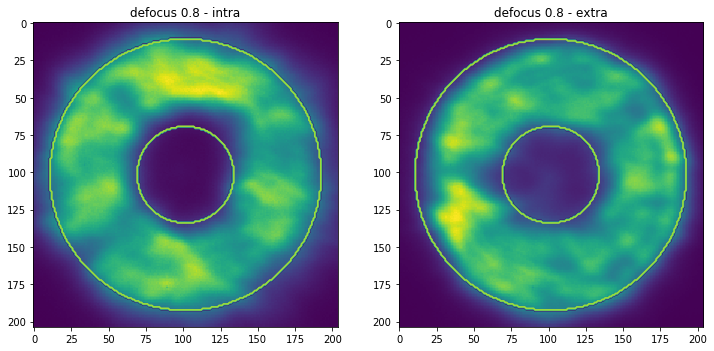

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages


In [28]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

Measured zernike coeficients: [-4.4368330280629955, -38.38267632761029, -48.12830297788725]
De-rotated zernike coeficients: [-37.88783762   7.57806635 -48.12830298]
Hexapod offset: [0.28922013 0.05784783 0.01145912]
Telescope offsets: [17.35320807  3.47087009  0.        ]

[-48.12830298 -50.42770673   9.93393867  -4.43683303 -38.38267633
  38.06997889 -34.34098274  -4.50568135 -16.71891106]


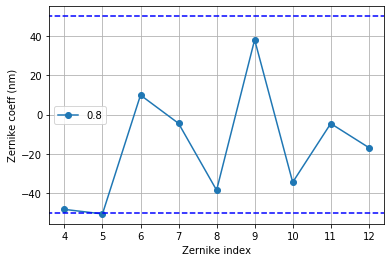

RemoteEvent(ATMCS, 0, target) falling behind; read 39 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages


In [29]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [30]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0., z=0.005)

In [31]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [32]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400039
extraImage expId for target: 2020031400040


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000039: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000040: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 19 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
Running source detection algorithm
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 37 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 47 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_mountMotorEncoders) falling behind; read 11 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 16 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling b

Measured zernike coeficients: [-18.61078307263227, -35.830349664963734, -5.617603687156515]
De-rotated zernike coeficients: [-33.31441925  22.81062633  -5.61760369]
Hexapod offset: [0.25430854 0.17412692 0.00133752]
Telescope offsets: [15.25851263 10.44761511  0.        ]

[ -5.61760369  36.29273016 -18.57091896 -18.61078307 -35.83034966
  15.51732096 -42.11621061  16.47465784  -7.08507561]


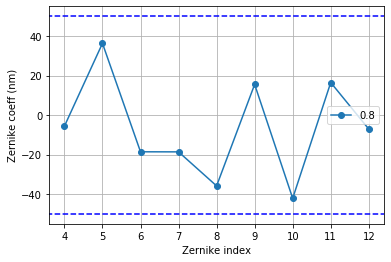

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140232486672192.


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 40 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 17 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 56 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 100 messages
RemoteEvent(ATPtg, 0, mountDataWarning) falling behind; read 17 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 97 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 20 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0,

In [33]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [34]:
salobj.AckError

lsst.ts.salobj.base.AckError

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages


In [ ]:
await cwfs.latiss.take_object(30.)

In [ ]:
cwfs.evt_logMessage.set_put(message=f"Hexapod LUT: 2020031300117")

In [ ]:
await cwfs.latiss.atcamera.cmd_endImage.start()

In [ ]:
cwfs.show_results()

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.5, z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
cwfs.angle

In [ ]:
cwfs.intra_visit_id = 2020031300124
cwfs.extra_visit_id = 2020031300125
cwfs.angle = 93.646

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
Measured zernike coeficients: [56.73010676525756, 8.189632125965955, -182.83805153268753]
Measured zernike coeficients: [124.71311827603878, -22.518979644650848, -203.58845212289884]


In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=-0.5, z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
cwfs.angle

In [ ]:
cwfs.intra_visit_id = 2020031200363
cwfs.extra_visit_id = 2020031200364
cwfs.angle = 94.78393081417468

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=-0.5, z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
cwfs.angle

In [ ]:
cwfs.intra_visit_id = 2020031200365
cwfs.extra_visit_id = 2020031200366
cwfs.angle = 95.00421417197606


In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.5, z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
cwfs.angle

In [ ]:
cwfs.intra_visit_id = 2020031200367
cwfs.extra_visit_id = 2020031200368
cwfs.angle = 95.19698512172705

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0.5, y=0., z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
cwfs.angle

In [ ]:
cwfs.intra_visit_id = 2020031200361
cwfs.extra_visit_id = 2020031200362
cwfs.angle = 95.36627323544002

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=-1.0, y=0., z=0.)

In [ ]:
await cwfs.take_intra_extra()

In [ ]:
cwfs.angle

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0.5, y=0., z=0.)

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': -0.09199987,
          'y':  -0.13539846,
          'z':   0.05523413,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': -0.01062974/2.,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': -0.21565734,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

[-0.37688719 -0.03842189 -0.00876713]

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.40382696/2.,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
await cwfs.latiss.take_object(exptime=1,n=1)

In [ ]:
cwfs.intra_visit_id = 2020022000254
cwfs.extra_visit_id = 2020022000255
cwfs.angle = 0.

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.40382696/2.,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.cwfs_selected_sources

In [ ]:
bbox = cwfs.source_selection_result.sources[6].getFootprint().getBBox()

In [ ]:
bbox

In [ ]:
img_mean = np.mean(cwfs.detection_exp[bbox].image.array)
img_min = np.min(cwfs.detection_exp[bbox].image.array)
img_max = np.max(cwfs.detection_exp[bbox].image.array)
img_std = np.std(cwfs.detection_exp[bbox].image.array)
print(img_max)
image = np.array(cwfs.detection_exp[bbox].image.array, copy=True)
# image[image > img_mean+5*img_std] = img_min
image[image == img_max] = img_min
plt.imshow(image, origin='lower')

In [ ]:
cwfs = LatissCWFSAlign(index=1)

In [ ]:
await cwfs.start_task

In [ ]:
cwfs.filter = "empty_1"
cwfs.grating = "empty_1"

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
await cwfs.attcs.ataos.cmd_enableCorrection.set_start(hexapod=True, m1=False)

In [ ]:
await cwfs.attcs.atpneumatics.cmd_openM1Cover.start()

In [ ]:
await cwfs.attcs.ataos.cmd_resetOffset.start()

In [ ]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis="z", offset=-0.18)

In [ ]:
44.58+29

In [ ]:
await cwfs.attcs.shutdown()

In [ ]:
await cwfs.latiss.standby()

In [ ]:
angles = [94.29546258589602, 94.55345673626783, 94.78393081417468, 95.00421417197606, 95.19698512172705]

In [ ]:
zern = [[56.73010676525756, 8.189632125965955, -182.83805153268753],
[124.71311827603878, -22.518979644650848, -203.58845212289884],
[53.20468192736806, 0.10889426038000716, -242.04429369018686],
[-28.441399439485657, -2.2013288336828327, -185.3117742900592], 
[63.63531388244971, 1.7177890049827167, -232.19198776848006]]

In [ ]:
zern_derot = []
for i in range(len(zern)):
    print(i, zern[i], angles[i])
    zern_derot.append(np.matmul(zern[i], cwfs.rotation_matrix(angles[i])))

In [ ]:
hex_offset = []
for i in range(len(zern)):
    hex_offset.append(np.matmul(zern_derot[i], cwfs.sensitivity_matrix))

In [ ]:
for i in range(1, len(zern)):
    print(zern_derot[i] - zern_derot[0])

In [ ]:
for i in range(1, len(zern)):
    print(zern_derot[i] - zern_derot[0])

In [ ]:
for i in range(1, len(hex_offset)):
    print(hex_offset[i] - hex_offset[0])

In [ ]:
zern[1][0] - zern[0][0]

In [ ]:
zern[2][0] - zern[0][0]

In [ ]:
zern[3][0] - zern[0][0]

In [ ]:
zern[4][0] - zern[0][0]

In [ ]:
np.matmul(np.array([40,40,40]), cwfs.sensitivity_matrix)

In [ ]:
await cwfs.attcs.atmcs.cmd_stopTracking.start()

In [ ]:
await cwfs.attcs.stop_tracking()

In [ ]:
await cwfs.attcs.point_azel(az=0., el=60.)

In [ ]:
await cwfs.attcs.cancel_not_done(cwfs.attcs.scheduled_coro)

In [ ]:
await cwfs.attcs.atptg.cmd_stopTracking.start()

In [ ]:
await cwfs.attcs.atmcs.cmd_startTracking.start()

In [ ]:
await salobj.set_summary_state(cwfs.attcs.atmcs, salobj.State.ENABLED)

In [ ]:
from lsst.ts.standardscripts.auxtel.butler import Butler

In [ ]:
cwfs.intra_visit_id = 2020031300372
cwfs.extra_visit_id = 2020031300373
cwfs.angle = -46.
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = 2020031300374
cwfs.extra_visit_id = 2020031300375
cwfs.angle = -46.
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = 2020031300376
cwfs.extra_visit_id = 2020031300377
cwfs.angle = -46.
await cwfs.run_cwfs()

In [ ]:
[29.71847514753195, 17.86681285679587, -1.213452253165913]
[14.934738324464766, 5.856272280197036, -21.21998999634835]
[40.06543087437906, 32.901266153219204, -33.15808712800845]

In [ ]:
hex_offset = np.array([[ 0.05947998, -0.2579314 ,  0.00028892],
[ 0.04703734, -0.11306306,  0.00505238],
[ 0.03179081, -0.39447175,  0.00789478]])

In [ ]:
for axis in hex_offset.T:
    print(np.mean(axis), np.std(axis))

In [ ]:
cwfs.intra_visit_id = 2020031300391
cwfs.extra_visit_id = 2020031300392
cwfs.angle = 0.
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = 2020031300393
cwfs.extra_visit_id = 2020031300394
cwfs.angle = 0.
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = 2020031300395
cwfs.extra_visit_id = 2020031300396
cwfs.angle = 0.
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = 2020031300397
cwfs.extra_visit_id = 2020031300398
cwfs.angle = 0.
await cwfs.run_cwfs()

In [ ]:
cwfs.intra_visit_id = 2020031300399
cwfs.extra_visit_id = 2020031300400
cwfs.angle = 0.
await cwfs.run_cwfs()

In [ ]:
[ 0.06387424 -0.4071666  -0.01290144]
[ 0.07570877 -0.2744446  -0.0202457 ]
[-0.08653421 -0.20705053 -0.02045002]
[ 0.15920214 -0.07747376 -0.03179209]

In [ ]:
await cwfs.attcs.stop_tracking()

In [ ]:
vent_state = await cwfs.attcs.atpneumatics.evt_m1VentsPosition.aget()

In [ ]:
def print_evt_callback(data):
    print(data)

In [ ]:
cwfs.attcs.atpneumatics.evt_m1VentsPosition.callback = print_evt_callback

In [ ]:
await cwfs.attcs.atpneumatics.cmd_openM1CellVents.start()

In [ ]:
await cwfs.attcs.atpneumatics.cmd_closeM1CellVents.start()

In [ ]:
await cwfs.attcs.enable()

In [ ]:
await cwfs.attcs.atdometrajectory.cmd_enable.start()

In [ ]:
await cwfs.attcs.ataos.cmd_enableCorrection.set_start(hexapod=True, m1=True)

In [ ]:
await cwfs.attcs.ataos.cmd_disabeCorrection.set_start(disableAll=True)

In [ ]:
await cwfs.attcs.ataos.cmd_

In [35]:
await cwfs.attcs.atptg.cmd_pointNewFile.start()
await cwfs.attcs.atptg.cmd_pointAddData.start()

In [38]:
(85-17)/10

6.8

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 15 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 77 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 74 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 69 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) fa

In [39]:
await cwfs.attcs.atdome.cmd_openShutter.start()

In [41]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400150
extraImage expId for target: 2020031400151


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000150: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 38 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages
AT_O_20200314_000151: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
Running source detection algorithm
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 47 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 10 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_mountMotorEncoders) falling 

ValueError: operands could not be broadcast together with shapes (32,32) (204,204) 

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 22 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224499803904 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224499803904 and this is thread id 140232486672192.


In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [42]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400197
extraImage expId for target: 2020031400198


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000197: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 34 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

AT_O_20200314_000198: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
Running source detection algorithm
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 10 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_mountMotorEncoders) falling behind; read 11 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; r

Measured zernike coeficients: [-5.107636128393442, 69.77887762425807, 905.7608440287012]
De-rotated zernike coeficients: [ 69.93161953   2.17905933 905.76084403]
Hexapod offset: [-0.53382916  0.01663404 -0.21565734]
Telescope offsets: [-32.0297494    0.99804244   0.        ]

[905.76084403 -88.48009563  90.13442932  -5.10763613  69.77887762
  25.42102497 -58.81542125  36.42332174 -24.74251782]


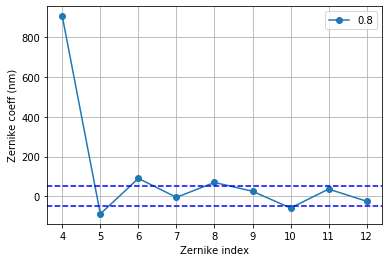

In [43]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

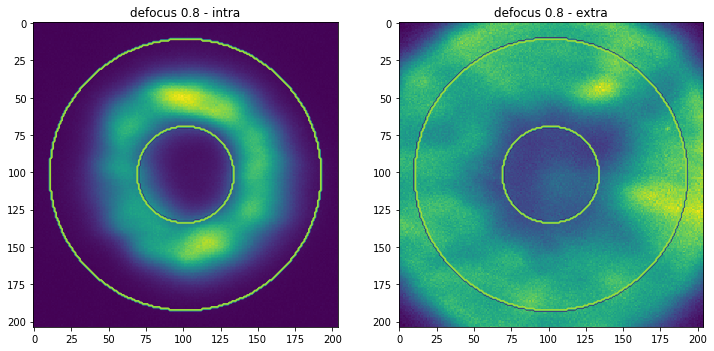

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


In [44]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [45]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': -0.21565734,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [46]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.


Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
intraImage expId for target: 2020031400199
extraImage expId for target: 2020031400200


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000199: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000200: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 46 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 50 messages
RemoteTelemetry(ATPneumatics, 0, m1AirPressure) falling behind; read 12 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, mount_Nasmyth_Encoders) falling behind; re

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224592328448 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224592328448 and this is thread id 140232486672192.
Exception ignore

Measured zernike coeficients: [-19.598235711706124, 91.43737337789372, -313.17532777159647]
De-rotated zernike coeficients: [  92.62610348   12.85647879 -313.17532777]
Hexapod offset: [-0.70706949  0.09814106  0.07456555]
Telescope offsets: [-42.42416953   5.88846357   0.        ]



Measured zernike coeficients: [-19.598235711706124, 91.43737337789372, -313.17532777159647]
De-rotated zernike coeficients: [  92.62610348   12.85647879 -313.17532777]
Hexapod offset: [-0.70706949  0.09814106  0.07456555]
Telescope offsets: [-42.42416953   5.88846357   0.        ]

[-313.17532777 -113.64984091   98.01956702  -19.59823571   91.43737338
   49.04364288  -63.47433195   37.60843039  -31.39235275]


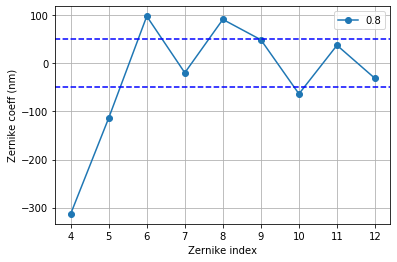

In [47]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

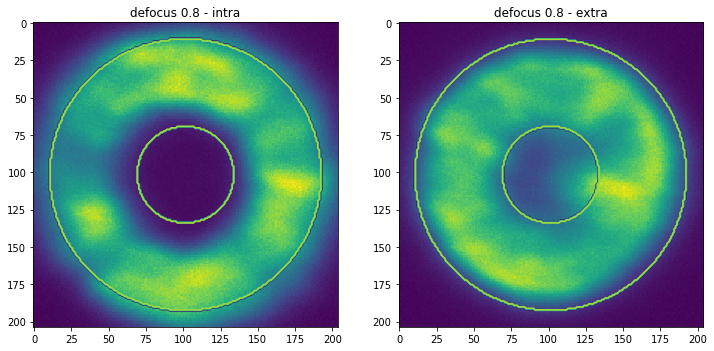

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages


In [48]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [49]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.07,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [50]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031400201
extraImage expId for target: 2020031400202


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 15 messages
AT_O_20200314_000201: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000202: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 47 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_mountMotorEncoders) falling behind; read 10 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 60 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 14 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) fall

In [53]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.08,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages


Measured zernike coeficients: [7.148826797480406, 70.13863943217503, -329.35130896171637]
De-rotated zernike coeficients: [  69.05199388  -14.22521025 -329.35130896]
Hexapod offset: [-0.52711446 -0.10858939  0.07841698]
Telescope offsets: [-31.62686743  -6.51536347   0.        ]

[-329.35130896  -92.14746062  117.63923536    7.1488268    70.13863943
   12.524284    -54.57401157   50.44885008  -21.71728789]


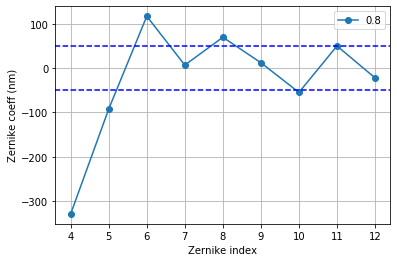

In [51]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

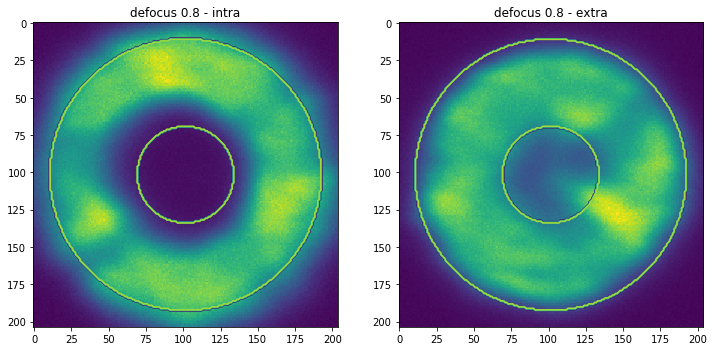

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224508196608 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224508196608 and this is thread id 140232486672192.
Exception ignore

In [52]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [55]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
intraImage expId for target: 2020031400208
extraImage expId for target: 2020031400209


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000208: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224865494784 and this is thread id 140224583935744.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

AT_O_20200314_000209: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 33 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
Running source detection algorithm
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 10 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 41 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 11 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 62 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling b

Measured zernike coeficients: [-30.228529478076577, -70.58831758361224, -263.4822743173287]
De-rotated zernike coeficients: [ -73.10326058   23.50293315 -263.48227432]
Hexapod offset: [0.55804016 0.1794117  0.06273387]
Telescope offsets: [33.48240943 10.7647022   0.        ]

[-263.48227432    9.52258681 -173.49997595  -30.22852948  -70.58831758
  -33.87643497   18.2933905    53.19130313   18.19245853]


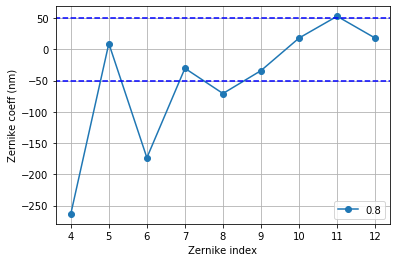

In [56]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [58]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.06,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

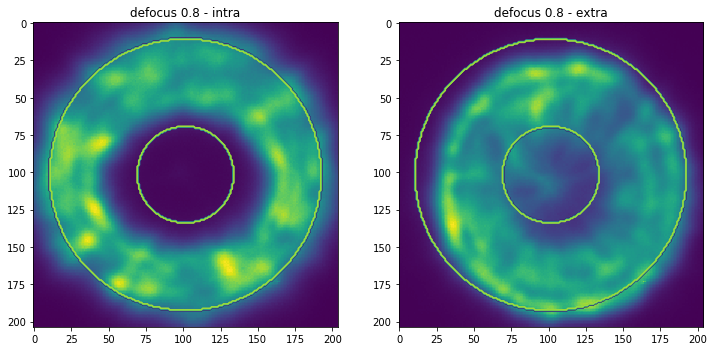

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


In [57]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [59]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.


Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140232486672192.


intraImage expId for target: 2020031400210
extraImage expId for target: 2020031400211


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000210: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 33 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000211: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 32 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 23 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 48 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 15 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 13 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 13 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 13 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 12 me

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224609113856 and this is thread id 140232486672192.
Exception ignore

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 28 messages
Measured zernike coeficients: [20.47979245644456, -19.079792522821773, -11.632175513682672]
De-rotated zernike coeficients: [-18.70635968 -20.82144301 -11.63217551]
Hexapod offset: [ 0.14279664 -0.15894231  0.00276957]
Telescope offsets: [ 8.56779833 -9.53653878  0.        ]



In [60]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

Measured zernike coeficients: [20.47979245644456, -19.079792522821773, -11.632175513682672]
De-rotated zernike coeficients: [-18.70635968 -20.82144301 -11.63217551]
Hexapod offset: [ 0.14279664 -0.15894231  0.00276957]
Telescope offsets: [ 8.56779833 -9.53653878  0.        ]

[-11.63217551   1.25420404 -82.54924055  20.47979246 -19.07979252
 -21.34334519  35.15794274  55.43834096   1.96287995]


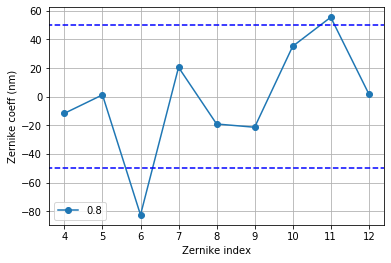

In [61]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

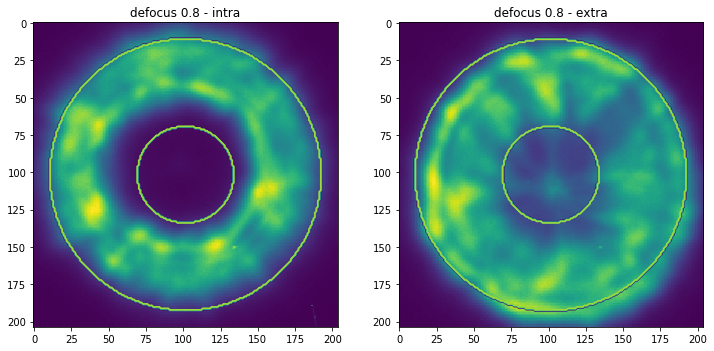

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages


In [62]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [81]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031400291
extraImage expId for target: 2020031400292


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000291: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000292: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 32 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 42 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 45 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 60 messages
RemoteEvent(ATDome, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 13 messages
RemoteEv

In [82]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.09,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

Measured zernike coeficients: [-82.61688553337069, -44.559779301396205, -372.8285237667032]
De-rotated zernike coeficients: [ -49.41423367   79.80825282 -372.82852377]
Hexapod offset: [0.37720789 0.6092233  0.0887687 ]
Telescope offsets: [22.63247344 36.55339824  0.        ]

[-372.82852377  -23.57996782  -87.54911277  -82.61688553  -44.5597793
   -5.83698713    1.07602542   34.29988957   15.1921503 ]


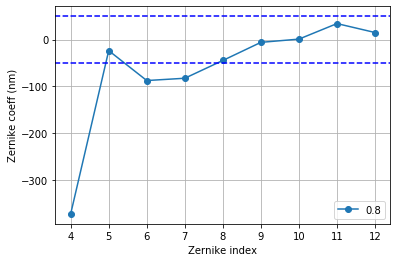

In [83]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

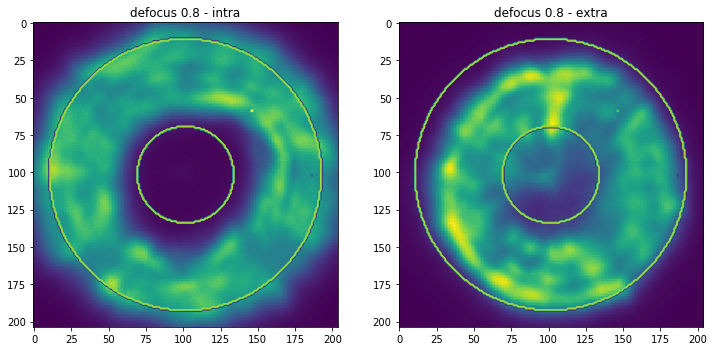

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages


In [84]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [85]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
intraImage expId for target: 2020031400293
extraImage expId for target: 2020031400294


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140224865494784.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224583935744 and this is thread id 140224865494784.


AT_O_20200314_000293: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 19 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 20 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


AT_O_20200314_000294: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
Running source detection algorithm
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 47 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 62 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 13 mes

In [80]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


Measured zernike coeficients: [-18.421561358123476, -62.865484035045824, -29.371349030585357]
De-rotated zernike coeficients: [-64.1572542   13.2389478  -29.37134903]
Hexapod offset: [0.48975003 0.10106067 0.00699318]
Telescope offsets: [29.38500193  6.06364022  0.        ]

[ -29.37134903   41.71679535 -171.31046988  -18.42156136  -62.86548404
   -2.37520007   50.05020769   24.5239713    -5.36288034]


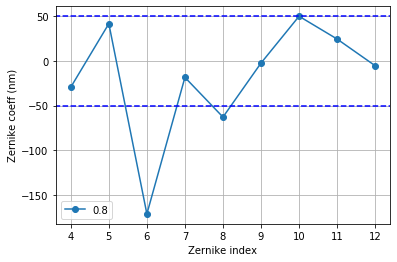

Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224865494784 and this is thread id 140232486672192.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f8a4c4f8cb0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140224865494784 and this is thread id 140232486672192.
Exception ignore

In [86]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

In [80]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.2,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

In [80]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.2,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

In [80]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.2,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

# Last one

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None
await cwfs.run_cwfs()

In [80]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.2,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [78]:
await cwfs.attcs.stop_tracking()

In [77]:
await cwfs.attcs.atptg.cmd_stopTracking.start()

In [79]:
await cwfs.attcs.atmcs.cmd_stopTracking.start()

In [87]:
await cwfs.attcs.enable()

Enabling all components
All components enabled.
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 15 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [91]:
await cwfs.attcs.atptg.cmd_pointCloseFile.start()

RemoteEvent(ATMCS, 0, target) falling behind; read 19 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 98 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


In [90]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': -0.1,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [92]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': 0.3,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages


In [97]:
await cwfs.attcs.slew_object("m104", rot_sky=-180.)

Slewing to m104: 12 39 59.4318 -11 37 22.995
[Telescope] delta Alt = -000.018 | delta Az = -000.059 delta N1 = -000.000 delta N2 = -145.163 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.007 delta N1 = +000.000 delta N2 = -141.651 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.006 delta N1 = +000.000 delta N2 = -135.628 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.007 delta N1 = +000.000 delta N2 = -129.603 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.006 delta N1 = +000.000 delta N2 = -125.564 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.005 delta N1 = +000.000 delta N2 = -119.542 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.006 delta N1 = -000.000 delta N2 = -113.517 [Dome] delta Az = +000.263
[Telescope] delta Alt = +000.001 | delta Az = +000.006 delta N1 = -000.000 delta N2 = -109.484 [Dome]

In [96]:
await cwfs.attcs.cancel_not_done(cwfs.attcs.scheduled_coro)

In [100]:
await cwfs.latiss.take_object(60)

array([2020031400323])

RemoteEvent(ATMCS, 0, target) falling behind; read 40 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 51 messages


In [101]:
await cwfs.attcs.slew_object("m68", rot_sky=-180.)

Slewing to m68: 12 39 27.98 -26 44 38.6
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
[Telescope] delta Alt = +009.947 | delta Az = -040.894 delta N1 = +000.000 delta N2 = +029.262 [Dome] delta Az = -036.483
[Telescope] delta Alt = +007.962 | delta Az = -037.256 delta N1 = +000.000 delta N2 = +028.095 [Dome] delta Az = -034.533
[Telescope] delta Alt = +002.389 | delta Az = -031.274 delta N1 = +000.000 delta N2 = +025.048 [Dome] delta Az = -030.473
[Telescope] delta Alt = +000.005 | delta Az = -025.308 delta N1 = -000.000 delta N2 = +020.303 [Dome] delta Az = -024.753
[Telescope] delta Alt = -000.002 | delta Az = -021.394 delta N1 = -000.000 delta N2 = +016.546 [Dome] delta Az = -018.963
[Telescope] delta Alt = -000.002 | delta Az = -017.599 delta N1 = +000.000 delta N2 = +012.644 [Dome] delta Az = -012.043
[Telescope] delta Alt = +000.000 | delta Az = -012.301 delta N1 = +000.000 delta N2 = +

In [104]:
await cwfs.latiss.take_object(30, 5)

RemoteEvent(ATMCS, 0, target) falling behind; read 19 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages


array([2020031400326, 2020031400327, 2020031400328, 2020031400329,
       2020031400330])

In [106]:
await cwfs.attcs.slew_object("m87", rot_sky=-180.)

Slewing to m87: 12 30 49.4233 +12 23 28.043
RemoteEvent(ATMCS, 0, target) falling behind; read 33 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 33 messages
[Telescope] delta Alt = -031.877 | delta Az = +055.475 delta N1 = +000.000 delta N2 = -019.174 [Dome] delta Az = +056.019
[Telescope] delta Alt = -028.230 | delta Az = +051.806 delta N1 = -000.000 delta N2 = -017.671 [Dome] delta Az = +054.079
[Telescope] delta Alt = -022.303 | delta Az = +045.791 delta N1 = -000.000 delta N2 = -013.338 [Dome] delta Az = +049.989
[Telescope] delta Alt = -016.695 | delta Az = +039.774 delta N1 = -000.000 delta N2 = -007.457 [Dome] delta Az = +044.269
[Telescope] delta Alt = -011.655 | delta Az = +033.760 delta N1 = -000.000 delta N2 = -003.894 [Dome] delta Az = +039.049
[Telescope] delta Alt = -008.730 | delta Az = +029.748 delta N1 = +000.000 delta N2 = -000.637 [Dome] delta Az = +030.199
[Telescope] delta Alt = -005.109 | delta Az = +023.768 delta N1 = -000.000 delta N2

In [107]:
await cwfs.latiss.take_object(5)

array([2020031400331])

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [108]:
await cwfs.latiss.take_object(30)

array([2020031400332])

RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages


In [109]:
await cwfs.attcs.slew_object("BD-19 3758", rot_sky=-180.)


Slewing to BD-19 3758: 13 52 31.4993 -19 48 36.105
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
[Telescope] delta Alt = +036.176 | delta Az = +030.738 delta N1 = -000.000 delta N2 = -063.126 [Dome] delta Az = -002.961
[Telescope] delta Alt = +032.860 | delta Az = +029.832 delta N1 = +000.000 delta N2 = -057.968 [Dome] delta Az = -002.961
[Telescope] delta Alt = +026.871 | delta Az = +026.884 delta N1 = +000.000 delta N2 = -051.910 [Dome] delta Az = -002.961
[Telescope] delta Alt = +020.971 | delta Az = +022.183 delta N1 = +000.000 delta N2 = -045.848 [Dome] delta Az = -002.961
[Telescope] delta Alt = +015.376 | delta Az = +016.436 delta N1 = +000.000 delta N2 = -041.786 [Dome] delta Az = -002.961
[Telescope] delta Alt = +011.946 | delta Az = +012.490 delta N1 = +000.000 delta N2 = -035.745 [Dome] delta Az = -002.961
[Telescope] delta Alt = +007.458 | delta Az = +007.091 delta N1 = +000.000 d

In [110]:
await cwfs.latiss.take_object(5)

array([2020031400333])

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [111]:
await cwfs.latiss.take_object(30)

array([2020031400334])

In [112]:
await cwfs.latiss.take_object(15)

array([2020031400335])

RemoteEvent(ATMCS, 0, target) falling behind; read 39 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 19 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 19 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 18 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 15 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 81 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
R